<img src='https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg' alt='Layout' align='left' width='25%'></img> 
<img src='https://media-exp1.licdn.com/dms/image/C560BAQFFDze0s3l-pQ/company-logo_200_200/0?e=2159024400&v=beta&t=jG_sh9NpwE6yc2TspIcL2YUR2X7OBzTrRSu6w7sNYtc' alt='Layout' align='right' width='10%'></img>
<br>
<br>
<br>
<br>
<br>

<img align="right" width="300" src="img/logo_group3.png">

# <font color=purple>OCTOPUS</font> project - expl<font color=purple>O</font>ring aerosol-<font color=purple>C</font>loud in<font color=purple>T</font>eracti<font color=purple>O</font>ns in CMI<font color=purple>P</font>6 models <font color=purple>U</font>sing joint-histogram<font color=purple>S</font>

*Report for the course "FORCeS & GEO4990 eScience Winter Course 2021: Linking Observations with Modelling"*

**Student:** *Adele Zaini, University of Oslo [adelez@student.matnat.uio.no]*

**Date:** *18.11.2021*

**Assistant:** *Matthias Schwarz [matthias.schwarz@misu.su.se] (Group 3)*

## Abstract

The aerosol-cloud interaction has been much explored in recent studies because of its high uncertain contribution to the anthropogenic forcing of climate change. An important aspect for reducing this uncertainty is to investigate future scenarios and to predict how the players in these dynamics react to future change in the climate. Global climate models are then needed in this analysis and their performance, directly affected by this uncertainty, needs to be investigated and improved. The high uncertainty relies on the high difficulty in the understanding of the multiple processes and players involved, related to the non-linearity between to the change in aerosols and multiple cloud properties. Using joint histogram probability histograms to account for this non-linearity, this work investigates the ability of the CMIP6 models to reproduce the cloud droplet number concentration (CDNC) relationship with the aerosol optical depth (AOD), taken as a proxy of the number of aerosols (or  CCN, cloud condensation nuclei). After individuating the best model reproducing the AOD (data was not available for CDNC) comparing the climate models climatological mean over 2000-2014 with MODIS observational data, joint histograms were drawn for different study areas and compared with the results obtained by previous studies on MODIS observations. The results show a better compatibility for the model GFDL-ESM4 over the other models, but the limitation of models’ monthly data compared to daily data from observations emerges in this study. The importance of separating the analysis into the liquid water content and the ice content is appreciated, which is even more evident in regional analysis. Further investigations are needed to better compare and quantify the performance of the CMIP6 models in reproducing the observed aerosol-cloud interaction.

## Table of Contents
1. [Introduction](#intro)
1. [Methods](#methods)
    1. [Packages](#packages)
    1. [Datasets](#dataset)
    1. [Analysis methods](#methodology)
1. [Results and discussion](#results)
1. [Conclusion](#conclusion)
1. [Outlook](#outlook)
1. [References](#references)
1. [Supplement](#suppl)

## 1. Introduction <a name="intro"></a>

Atmospheric aerosols are known to affect the radiative balance of the atmosphere, both through a direct interaction with radiation, absorbing or scattering it, and through indirect interactions with multiple cloud properties (IPCC, 2021). This second effect relies on the ability of many atmospheric aerosols to act as cloud condensation nuclei (CCN), influencing the cloud droplet number concentration (CDNC). It has been hypothesized that an increase in CDNC may result in an increase in cloud fraction (CF), leading to an increase in the cloud albedo at a constant cloud water content (Twomey effect), and resulting in a negative radiative forcing (RFaci, radiative forcing from aerosol–cloud interactions) (Gryspeerdt et al., 2017). Together with other changes in cloud properties due to changes in CDNC, theRFaci is a component of the total or effective radiative forcing (ERFaci) and accounts for the highest uncertainty in the anthropogenic component (IPCC, 2021). This uncertainty is partly due to the difficulty in separating aerosol effects on clouds from correlations generated by local meteorology (Gryspeerdt et al., 2016). Relative humidity in particular has been shown to obscure the causal relationship between aerosols and CF (Gryspeerdt et al., 2016). As many cloud properties are correlated to CF, the factors that obscure the aerosols–CF relationship can also confound other aerosol–cloud relationships, such as cloud top pressure (Gryspeerdt et al., 2014) and liquid water path (LWP) (Gryspeerdt et al., 2019).  Recent studies (Gryspeerdt et al., 2016, 2017,2019) have suggested that the sensitivity of CDNC to aerosol optical depth (AOD) is thought to be largely independent of the meteorological covariations and it has been introduced as a third variable on the chain of causality in AOD-CF and in AOD-LWP, breaking these relationships into two separate relationships each (Gryspeerdt et al., 2016, 2017,2019).  
This work will then investigate the AOD-CDNC relationship, common to the two related cloud properties, using global climate models’ outputs. Even if the uncertainty remains, observations show a significant progress has been made in constraining this forcing (Gryspeerdt et al., 2016, 2017,2019), but the ability of global models is here questioned and is highly probable to struggle in capturing these dynamics. Given the nonlinearities expected in these processes, the technique of the two dimensional joint histograms is used to keep as much information as possible and improving the estimate of the relationship between AOD and CDNC.
It is also important to underline that an assumption is made in this analysis: that the AOD is a suitable proxy of the cloud condensation nuclei (CCN). But some observational and model-based studies have shown a disconnect between AOD and CCN (Gryspeerdt et al., 2017). Because the AOD is a column-integrated measurement, it does not provide vertical information about the location of the aerosol, so this could result in decoupling cloud dynamics and presence of aerosol, because of boundary layer activities insolating different layers of the atmosphere. AOD also lacks information about the composition of the particles and is weighted preferentially toward larger particles, missing then information about smaller aerosol particles that are often emitted from anthropogenic activities (Gryspeerdt et al., 2017). 

#### Research questions:
1. *What is performance of the CMIP6 models in reproducing the modelled variables of AOD, CF, LWP in comparison to the MODIS observations?* The MODIS data for CDNC was not accessible to allow for a comparison of that variable.

1. *Are the CMIP6 models able to reproduce the joint histograms, drawn with the MODIS observations in Gryspeerdt et al. papers, for different combinations of variables (AOD-CDNC, AOD-CF, AOD-LWP)?*

The work was divided within the group members and the current report presents the evaluation of the models' perfomance using different techniques for the AOD variable and, afterwards, the joint histograms of AOD-CDNC for different regions and for an intercomparison within the models that present both variables.

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>


#### Create new conda environment name escience2021-aerosols

```
conda env create -f environment.yml
source activate escience2021
ipython kernel install --name "escience2021" --user
```

In [1]:
import os
# Manupulating data
import random
import numpy as np
import pandas as pd
from math import sqrt
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import s3fs
from datetime import datetime
import nc_time_axis
import pickle
import xesmf as xe
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
import xskillscore as xs
# Plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
from pandas.plotting import table
import cmaps
import seaborn as sns; sns.set()
%matplotlib inline
# My functions 
from eScience2021_Group3_Adele_functions import *
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
###!pip install matplotlib==3.5.0

### 2.B. Datasets <a name="datasets"></a>

#### MODIS satellite data
The observational data used to compare the models’ output are from the moderate resolution imaging spectrometer (MODIS) onboard the Terra satellite. The specific product used is the MOD08_M3, which is a level-3 MODIS gridded atmosphere monthly global joint product. It contains monthly 1° x 1° degree grid average values of several atmospheric parameters related to atmospheric aerosol particle properties, cloud optical and physical properties, and other athosmeric phenomena. To compare the AOD, the “AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean” aerosol product was used in this work, as algorithm that interpolates also the very bright areas, as the deserts. 

#### CMIP6 models
CMIP6 is the sixth generation of the Coupled Model Intercomparison Project, which consists of runs from around one hundred global climate models being produced across 49 different modelling groups and gathering different experiments. In this work, the experiment selected was "historical" and the run was the "r1i1p1f1". The main variables investigated were "cdnc" and "od550aer", standing for Cloud Droplet Number Concentration and Aerosol Optical Depth at 550 nm. Different models has been used and consequently different rispective grid were considered.
The overall covered time range is 1850-2014 and the time resolution is mainly monthly.

#### Data reading and processing

For the first part of comparison the data was selected in the time period of 2000-2014, common of the two datasets, and it was regridded to the coarser grid when comparing each model’s one to the MODIS 1°x1°grid. While for the final part of drawing the joint histograms, the grid was kept the one of each model’s and the time period was selected 2000-2014, as a compromise between computational efforts and having enough data for plotting the histograms.

The "cdnc" variable of the CMIP6 models is a 3D variable, introducing the vertical resolution with the so called *levels*. It is a quantity given by the atmospheric pressure and the value of "cdnc" can vary a lot for the different *pressure levels* (i.e. altitudes). Since it is compared to a single value measured from satellites, the maximum value of the "cdnc" is taken as a proxy. The mean underestimates the cloud droplet number concentration from MODIS data (several zero values can soppress it), while the integration over the levels overestimates it. A better method has not found in the literature.

For the regional joint histograms, four regions have been selected:

|A: North Atlantic|B: South Pacific|C: Peruvian stratocumulus deck| D: Namibian stratocumulus deck |
|--|--|--|--|
|Latitude|30º-50º N|20º-40º S|10º-30º S|5º-30º S|
|Longitude|20º-40º W|150º-170º W|80º-100º W|12.5º W-12.5º E|

These are the same areas of the paper Gryspeerdt et at. (2016) to better compare the results at the end.

In [3]:
############## Cell gathering all variables common for multiple functions ##############

# Select years (years in common for both datasets)
start_year = 2000
final_year = 2014
years = np.arange(start_year,final_year+1)

# Print functions progress
verbose = False

# Print figures and tables in Figures folder
save_fig = True

#Variables: 'lwp': liquid water path, 'cdnc': cloud droplet number concentration, 
#          "od550aer": aerosol optical depth, "clt": cloud fraction, "clivi": cloud ice content
all_vars = ["lwp", "cdnc", "od550aer", "clt", "clivi"]

# Info on areas of study fro the joint histograms
zones_lat = [(30,50),(-40,-20),(-30,-10),(-30,-5)]
zones_lon = [(140,160),(10,30),(80,100),(167.5,192.5)]
zones_titles = ["A: N. Atlantic", "B: S. Pacific", "C: Peruvian Sc.Edge", "D: Namibian Sc."]
zones_filenames = ["Atlantic", "Pacific", "Peruvian", "Namibian"]

In [4]:
# Open CMIP6 online catalog, common procedure for all data processing functions
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
print("CMIP6 catalog imported.\n")
    
# Data for the evaluation of the models' perfomance over AOD comparison with observations
aod_obs, aod_model_dict = read_process_aod_data(col, years, verbose=verbose)

# Lists of the models' name containing the target variables (i.e. AOD and CDNC)
models_with_aod_cdnc, models_with_all_vars = ['CESM2', 'CESM2-WACCM', 'GFDL-ESM4'], ['CESM2', 'CESM2-WACCM', 'GFDL-ESM4'] 
# NOTE: I inserted directly the outputs, because when rerunning the cells there were problems downloading 
# the CMIP6 catalog for the clt variable. Here is the function that skim all the models looking for the 
# ones with the target variables:
# ---> models_with_aod_cdnc, models_with_all_vars = selection_of_models(col, years, var_search = all_vars, verbose = True)

# Data for plotting the joint histograms
model_dict_tot = read_process_allvar_data(col, years, model_names = models_with_aod_cdnc, variables = ["cdnc", "od550aer"], verbose = verbose)

CMIP6 catalog imported.

Models with AOD in the right time range: ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'E3SM-1-1', 'IPSL-CM6A-LR', 'INM-CM5-0', 'CanESM5', 'MPI-ESM1-2-LR', 'INM-CM4-8', 'NorESM2-LM', 'CESM2-FV2', 'KACE-1-0-G', 'MPI-ESM-1-2-HAM', 'CESM2', 'MRI-ESM2-0', 'CESM2-WACCM', 'E3SM-1-0', 'CESM2-WACCM-FV2', 'E3SM-1-1-ECA', 'BCC-ESM1']
A DataArray for observed AOD and a dictionary of DataArray for modelled AOD are created.

Dictionary of DataArrays for models ['CESM2', 'CESM2-WACCM', 'GFDL-ESM4'] and variables ['cdnc', 'od550aer'] created.


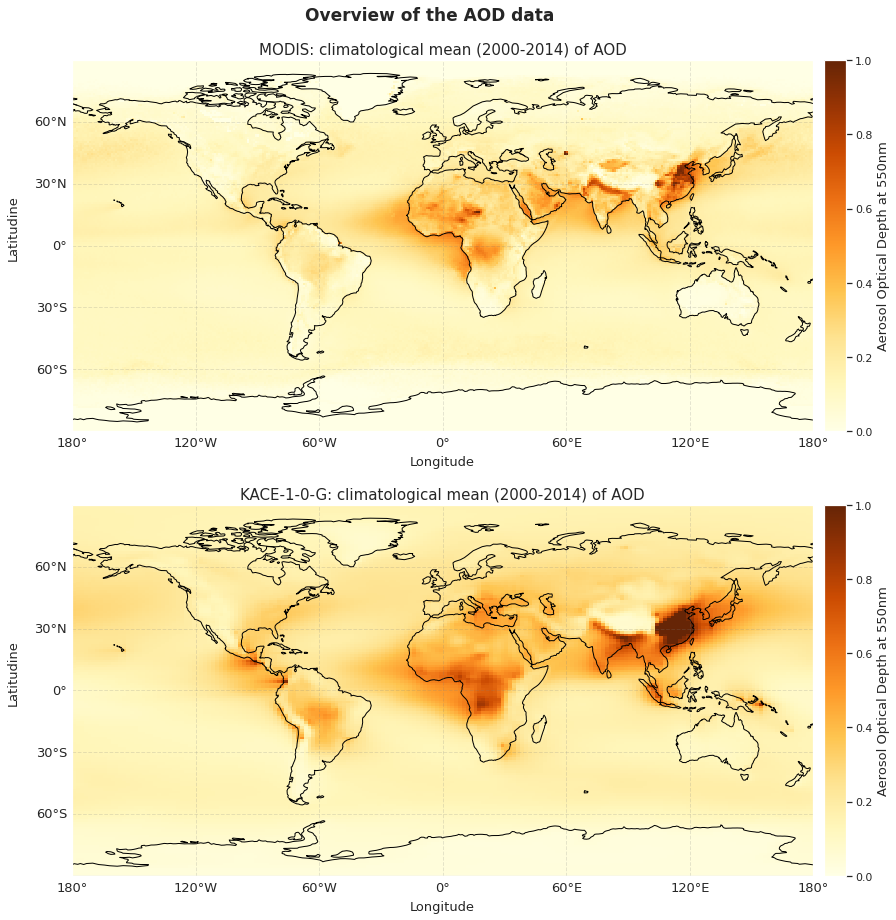

In [5]:
overview_aod_data(aod_obs, aod_model_dict,'KACE-1-0-G', years, save_fig = save_fig)

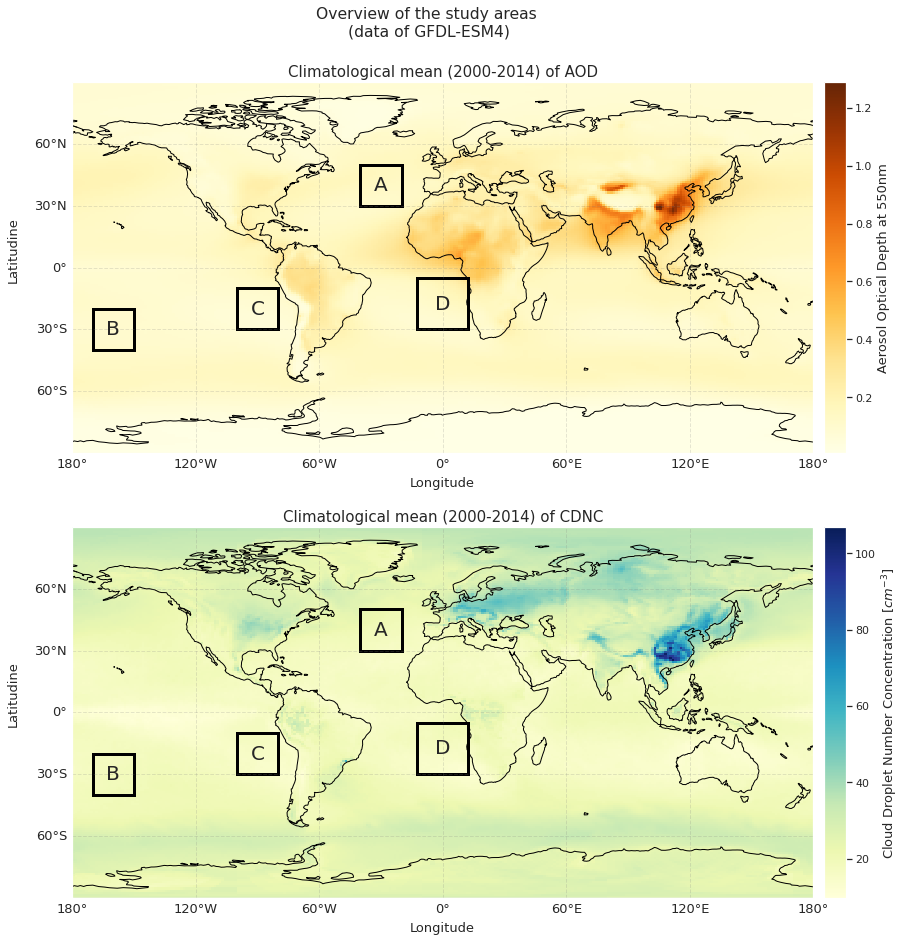

In [6]:
plot_study_areas(model_dict_tot, model_name = 'GFDL-ESM4', zones_lat = zones_lat, zones_lon = zones_lon, years = years, save_fig = save_fig)

### 2.C. Analysis methods <a name="methodology"></a>

#### a) Evaluate CMIP6 models' performance, in comparison with MODIS observations
In this work the CMIP6 models’ performance is investigated, in evaluating the comparison of the climatological mean of the AOD between the CMIP6 outputs and the MODIS observations over the time period of 2000-2014. The climatological mean is evaluated over the annual cycle. In other words, it means calculating the mean for each month in a year and then mean over them. In this way, the biases given by missing data in some period of time are buffered.  The comparison on the AOD is explored graphically, plotting the bias in the climatological means, and statistically, using the mean absolute error ($MAE$) and the root mean squared error ($RMSE$) to account for the difference, the $R^2$ to quantify the correlation and the maximum bias $\Delta_{max}$ in the each bias-plot to give an idea of the outliers and to try to capture the spatial differentiation without averaging down over all the grid points. At the end a cumulative error ($Total$) is evaluated rescaling the errors in the range $[0,1]$ and summing the values, in order to keep track of the magnitude and distances of the errors. Note that for $R^2$ was taken the $R^2' = 1- R^2$, because the model performs better when this paramter is higher rathen then smaller, as the other errors.

#### b) Draw the joint histograms, for different regions and models
In order to draw the joint histograms, it is firstly necessary to select the models with both the AOD and CDNC variables. Joint histograms are then plotted for a global and regional analysis on a monthly time resolution, taken the time range of 2000-2014. The intercomparison within the different models is performed at the end. 

## 3. Results and discussion <a name="results"></a>

### 3.A. Evaluation of models' perfomance

In [7]:
# Evaluate the errors and plot the climatological means as bias MODEL-MODIS 
error_df, ranking_tot, ranking_filt = models_evaluation(aod_obs, aod_model_dict, common_models = models_with_aod_cdnc, verbose = verbose, save_fig = save_fig)
# In the folder Figures/Performance_each_model/AOD_Bias the maps of the biases are plotted 
# error_df: dataframe containing all the error values for the different models
# ranking_tot: dictionary with the ranking of the models for each error type and for the total effect 
# ranking_filt: dictionary with the ranking of just the models with AOD and CDNC

Evaluating models' perfomance...
Figures are in the directory 'output/Figures/Performance_each_model'
Error analysis...


<Figure size 432x288 with 0 Axes>

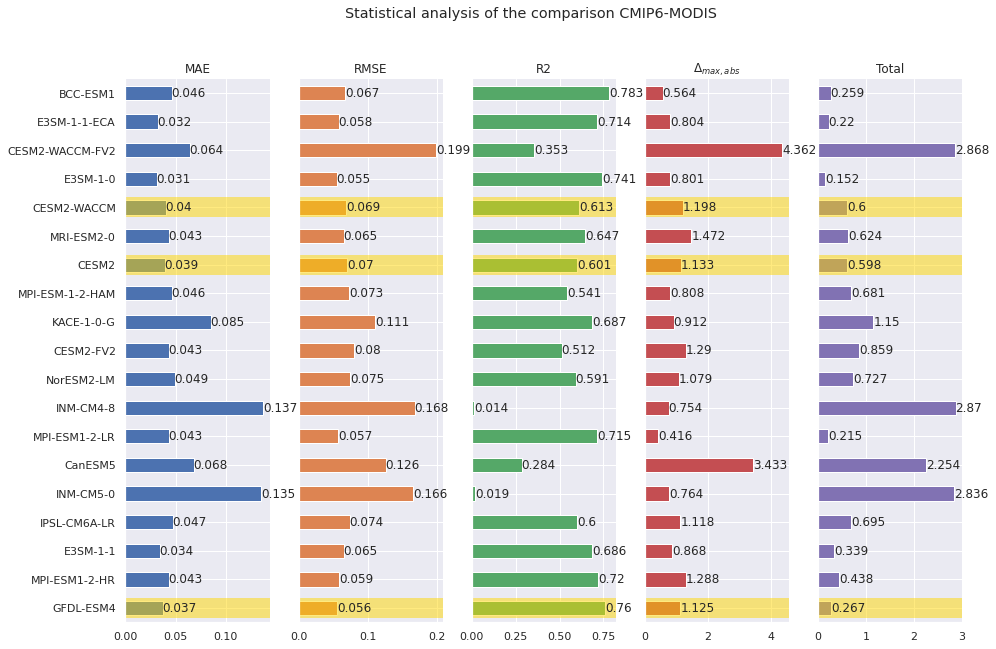

In [8]:
plot_errorbar(error_df, common_models = models_with_aod_cdnc, save_fig = save_fig)

The analysis is performed on 19 models, and it is possible to appreciate how models perfom differently according to different parameters. Looking at the bias-plots (in *Figures/Performance_each_model/AOD_Bias*) it is evident how different is their behaviour. in general, the most difficult areas to reproduce are the ones of natural aerosol production, which is understandable since athropogenic sources are easier to be detected and modelled. Another point to underline is that Sahara and a smaller area in Central Asia very often look the most problematic regions, this is probably due also to lacks in observations, since they are very bright desert areas and difficult to record by the satellites. Look at the [Supplement](#suppl) to have an overview of the two best and two worst models. The highlighted models are the ones with both AOD and CDNC, and we can see that they are not the best, but they perform relatively well, as we can see from the following figures.

In [9]:
display(pd.DataFrame.from_dict(ranking_filt))

MAE         RMSE           R2 $\Delta_{max, abs}$        Total
0    GFDL-ESM4    GFDL-ESM4    GFDL-ESM4           GFDL-ESM4    GFDL-ESM4
1        CESM2  CESM2-WACCM  CESM2-WACCM               CESM2        CESM2
2  CESM2-WACCM        CESM2        CESM2         CESM2-WACCM  CESM2-WACCM

After the selection of the ranking table (see [Supplement](#suppl) to see the full table), 'GFDL-ESM4' model results to best one followed by 'CESM2' and 'CESM2-WACCM' with a very similar perfomance within this two.

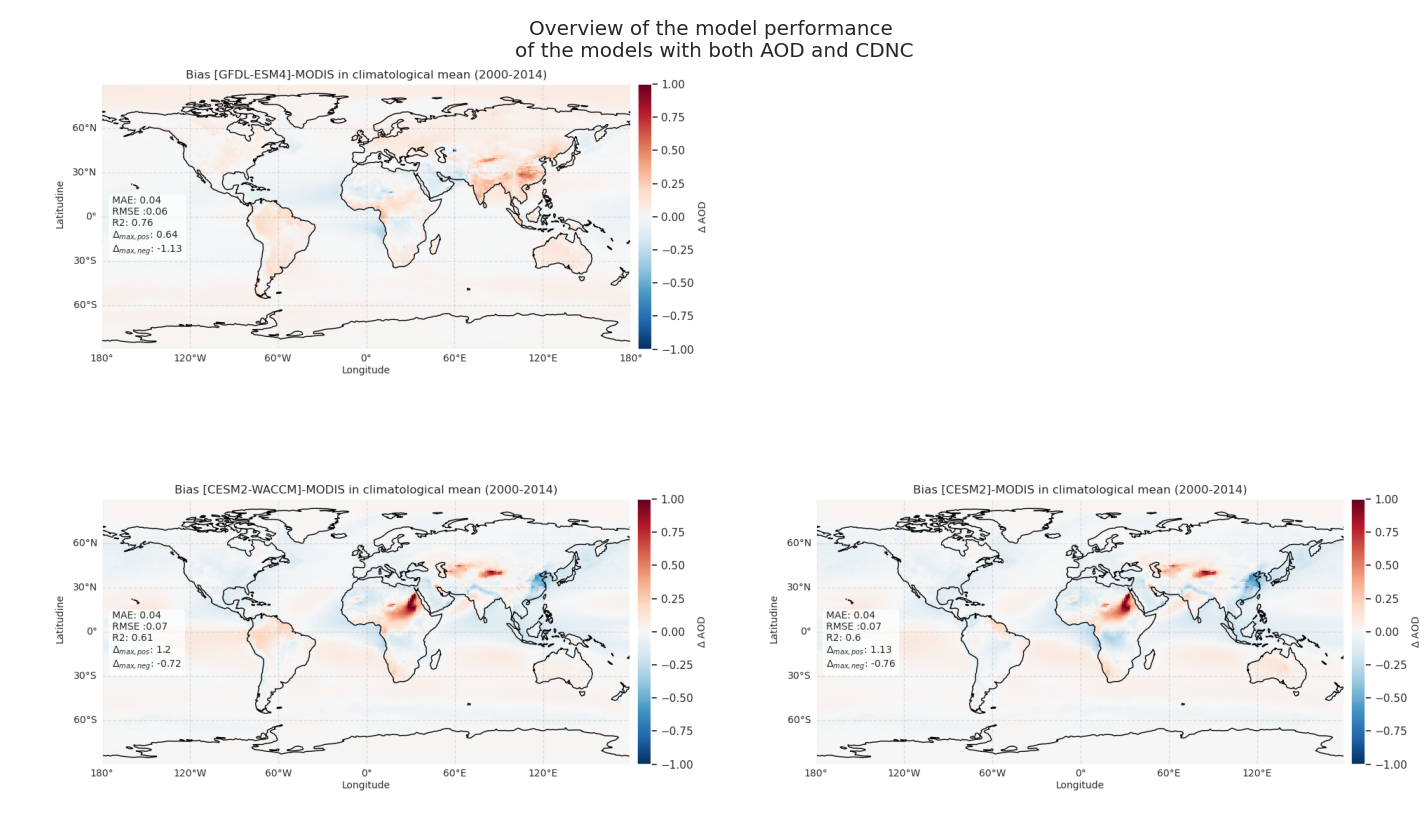

In [10]:
bests = [ranking_filt['Total'][0], None]
worsts = [ranking_filt['Total'][-1], ranking_filt['Total'][-2]]
plot_best_worst_maps(bests, worsts, title = "Overview of the model performance \nof the models with both AOD and CDNC")

The 'GFDL-ESM4' model results to be the best within the three models and we can appreciate it also from the bias-plot, whre the differences are moderate. The other two models ('CESM2', 'CESM2-WACCM') are basically the same, except for an extra Athmospheric component of the second, that models the upper layers of the atmosphere (Whole Atmospheric Community Climate Models). As we can see from the plots, their behaviour is very similar, showing some picks in the Sahara and central Asia, as previously highlighted, but for the rest they perform quite well.

### 3.B. Draw joint histograms

This work aims to evaluate if the CMIP6 models can reproduce the behaviour depicted by the joint histograms of Gryspeerdt et at. (2016, 2017, 2019) work. In particular for the AOD-CDNC relationship the joint histogram should look like this one:
<img width="800" src="img/MODIS_aod_cdnc.png">

Different comments need to be done:
1. The MODIS data has a **daily time resolution**
1. High and low **LTS**: the Low Troposphere Static stability is a measure of the difference in potential temperature between 700 and 1000 hPa. The LTS is used  in Gryspeerdt et at. work to separate different cloud regimes: *"low LTS regions have been shown to have more shallow cumulus-like clouds, with high LTS regions typically including more stratocumulus-like clouds."* Gryspeerdt et at. (2016)  
2. **$P(N_d|\tau_a)$**: they normalized the joint histogram given each $\tau_a$ (AOD) bin.
3. **No polar regions**: just areas within 60°S-60°N were considered
4. **Ice water content**: areas with $IWP > 5 g/cm^{-2}$ were not considered


In [11]:
# Preparing the dataframe as input of the joint histograms, raveling all the data. 
# Later regions will be selected from this dataset
# It takes some time to run...
model_names = ranking_filt['Total']
best_model = model_names[0]

global_df_tot = prepare_global_df(model_dict_tot, model_names, verbose = verbose)

In [12]:
# Plotting and saving the joint histograms figures in Figures/JointHistograms for different regions and models
for m, model in enumerate(model_names):
        joint_histograms(model, global_df_tot, zones_lat, zones_lon, zones_titles, zones_filenames, displayfig=False)

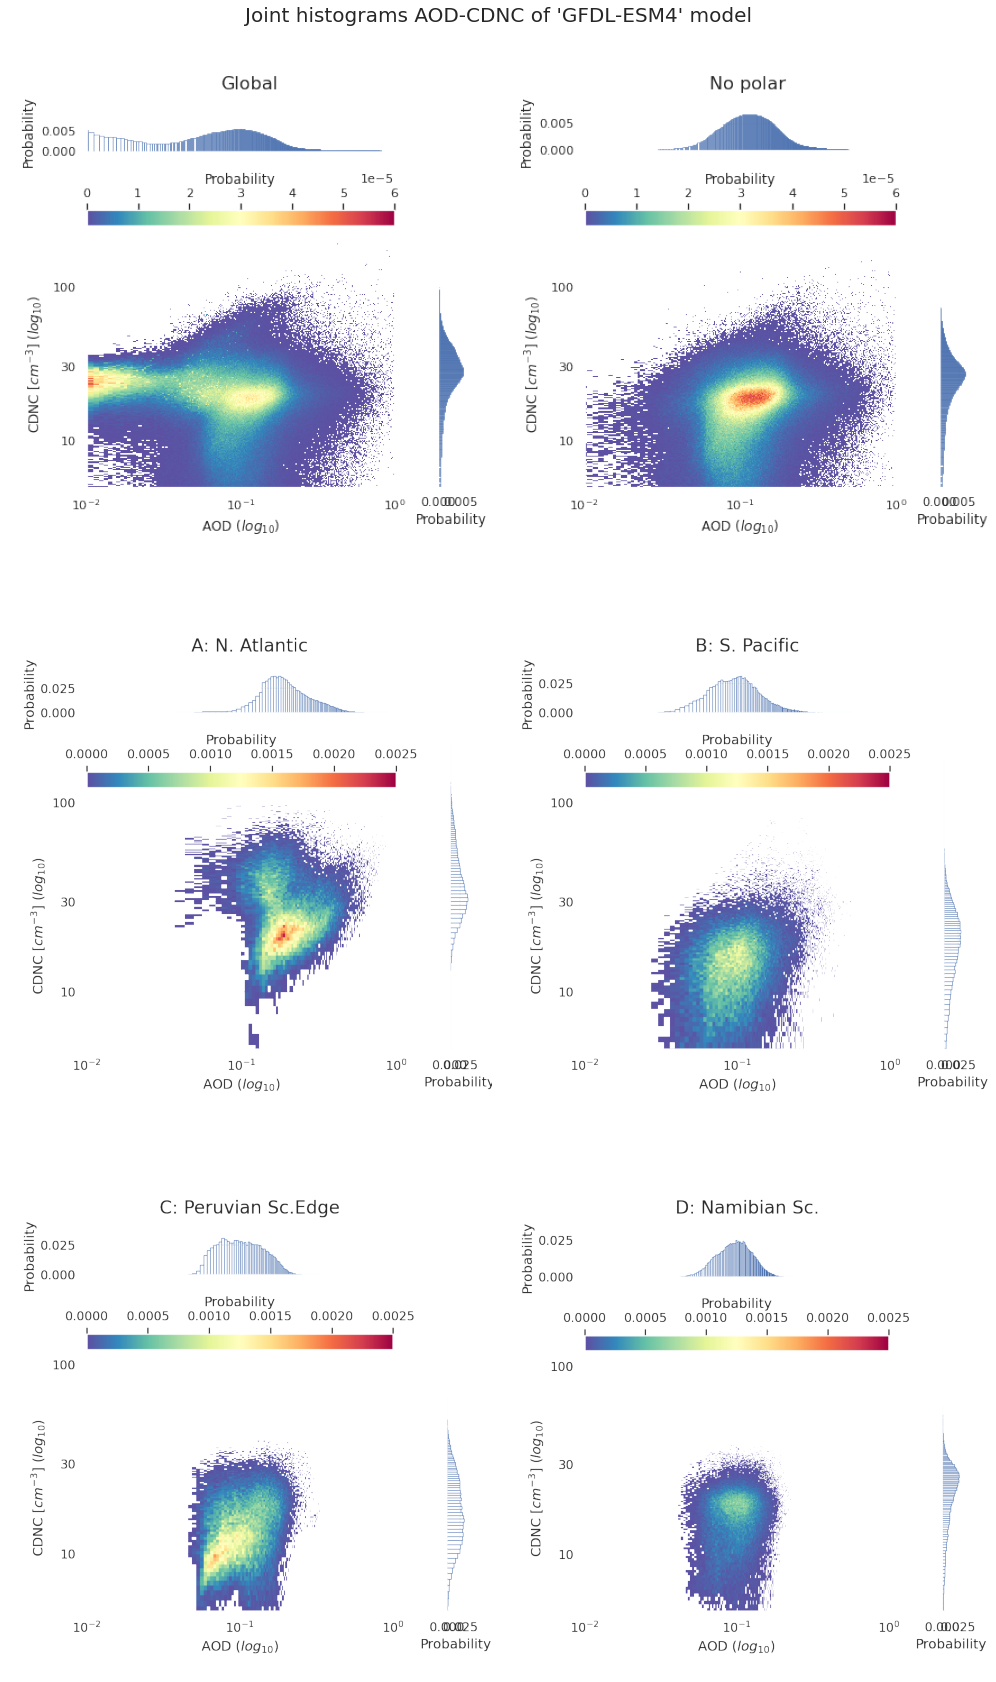

In [13]:
# Gather the joint histograms for the best model
merge_jointhist(best_model, zones_filenames)

Apparently the figures look very different from the Gryspeerdt‘s work, but this is mainly due to the fact that the models' data is on a monthly scale, while the MODIS data used in the paper is on a daily scale. This means that the edges/extremes of the histograms are smoothed and data gathers into the center of the graph. This is why the behaviour of this model is performing as we could expect, given the monthly time resolution. Note that the x and y axis are logarithmic and the x and y ranges of the papers are kept here to allow a comparison. We can firstly see the influence of the ice content given by the polar regions (global vs no_polar plots) that show a different regime from the liquid water part. Secondly, focusing more on the regional analysis, we can see that for example very "crowded" areas between $10-30 cm^{-3}$ of CDNC for the Namibian and Peruvian stratocumulus deck are appreciated also in the model's histograms. This is positively surprising considering that they are very problematic areas to model the relationship between AOD and CDNC since their dynamics are decoupled by the boundary layer activity (see Introduction). In general, we can notice a good agreement, despite the decisions taken in Gryspeerdt‘s work were not equally applied in this analysis (i.e. filtering ice content, normalizing the histograms...). Having a comparison with MODIS data on a monthly scale could quantify better the model performance and this could be an interesting further work to deepen.

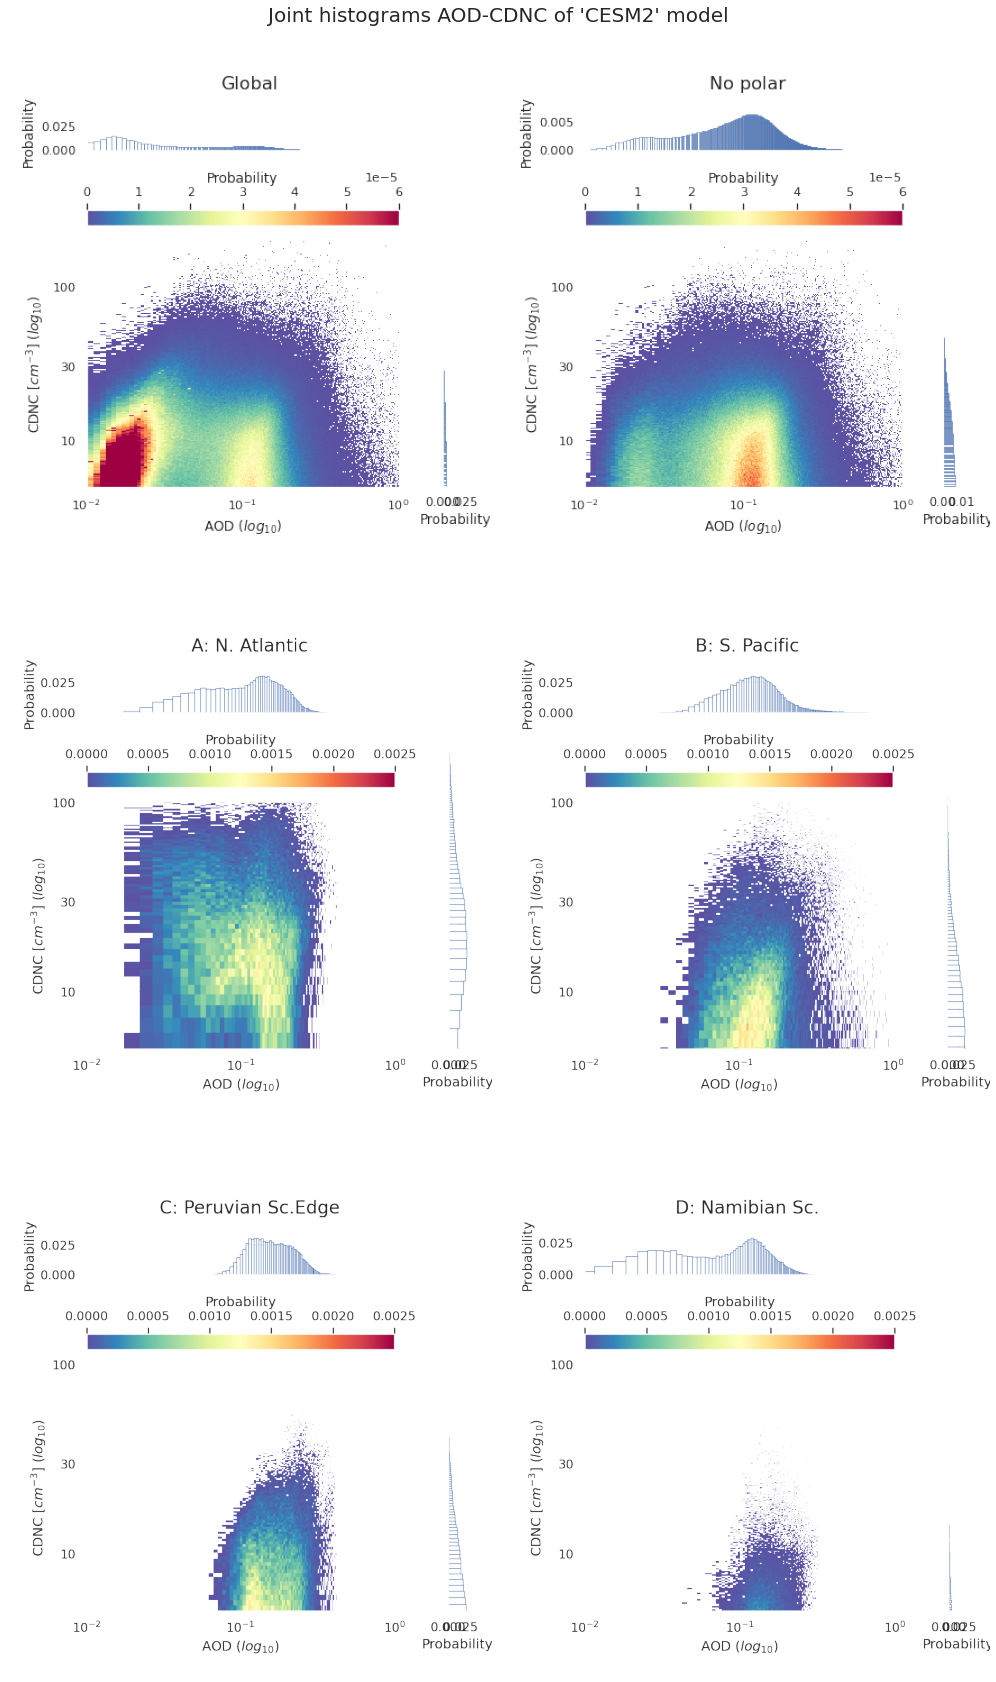

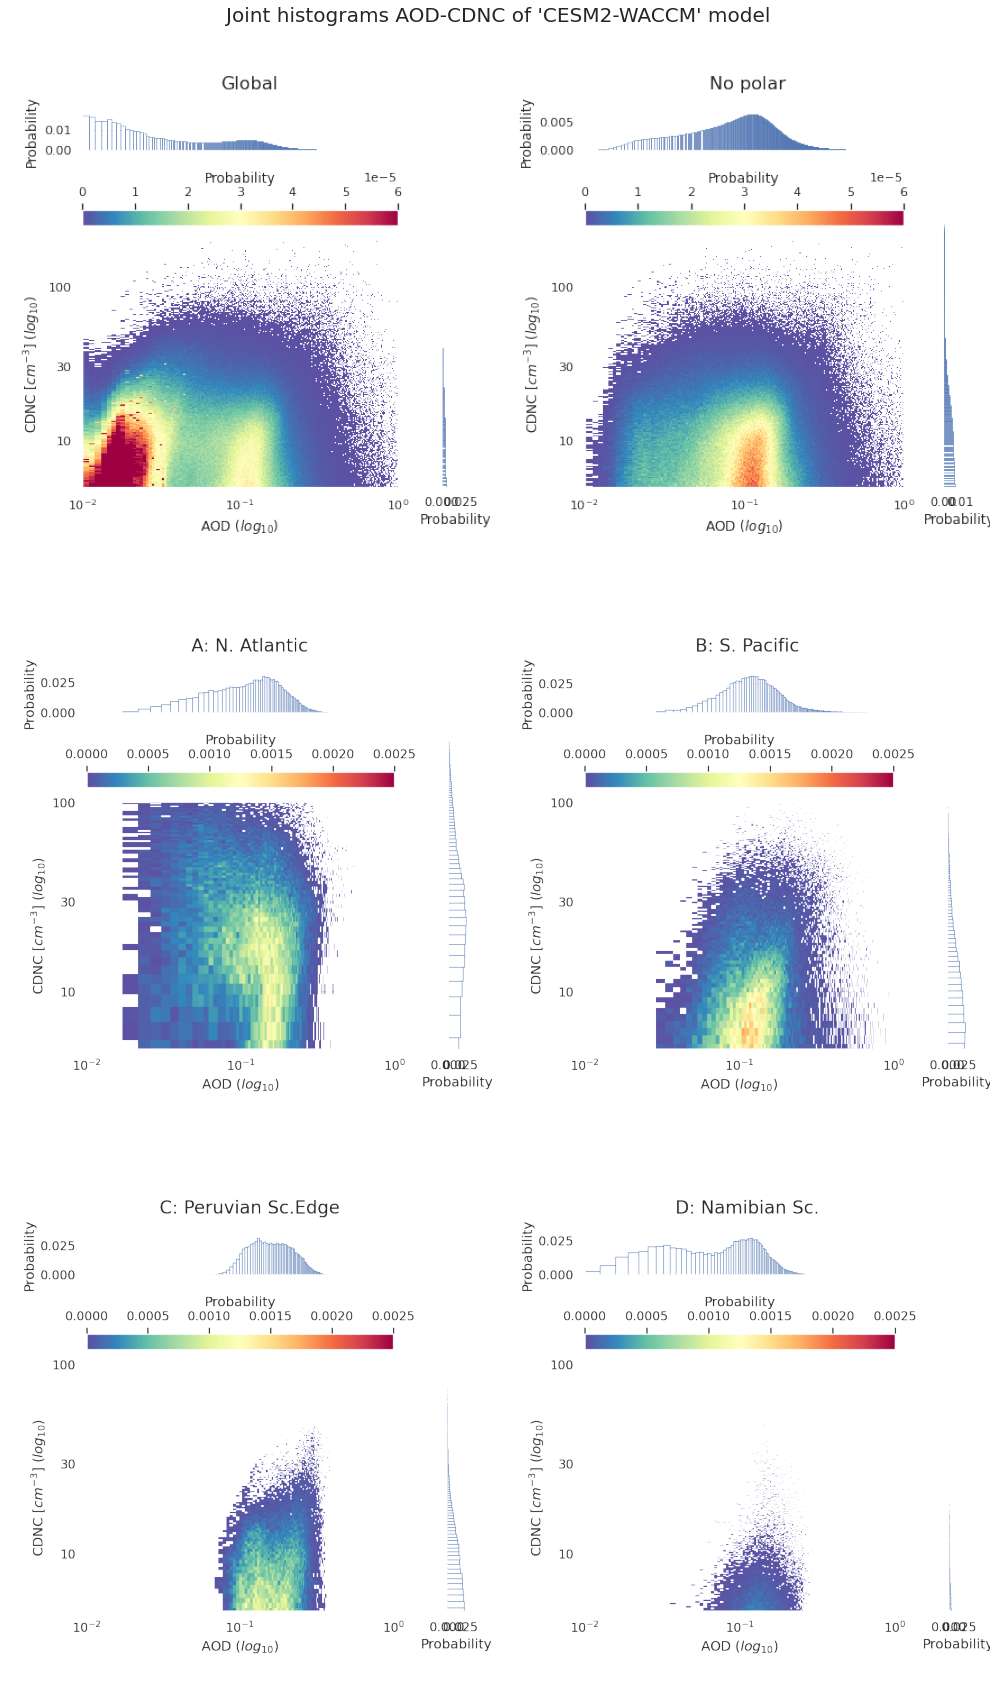

In [14]:
# Plotting joint histograms for the other two models
for m, model in enumerate(model_names):
    if not m==0:
        merge_jointhist(model, zones_filenames)

It is here evident that the perfomance of these two models is lower compared to the GFDL-ESM4 model. The pattern are similar within the two (almost the same model), but very different from the other and form the expectations. Keeping always the x and y ranges we can see how they tend to underestimate the CDNC (plots look cut at the bottom) but observations do not show any contributions below the considered y range. Again, the ice compenent shows a different regime, that is predominant in this case. Overall, we can conclude that these models lack in reproducing this relationship and make us appreciate even more the perfomance of the previous model.

## 4. Conclusion <a name="conclusion"></a>

A summary of the results: 

- Using graphical and statistical analysis on the performance of the CMIP6 models, different models showed a very good (bad) behaviour for different perfomance evaluations. 

- After filtrating the ranking scale with models that take into count all the variables, GFDL-ESM4 resulted to be the best choice.

- The joint histograms of the GFDL-ESM4 are on a monthly time resolution, while the MODIS data of the Gryspeerdt‘s papers are daily. This doesn’t allow to make a consistent comparison between the two set of plots. At a visual analysis, the obtained “blobs” are the result of the averaging out the extreme data within the month itself. This is why we don’t see the tails of the histograms.

- The ice content showed an independent trend, reflecting a different dynamics. This is an important point to consider in future analysis.

- The GFDL-ESM4 shows to perform more consistently with the observations also in the joint plots compared to the other models.

## 5. Outlook <a name="outlook"></a>

This is still an open work and interesting further work can be done:
- The perfomance analysis of the CMIP6 models has been made over the spatial dimensions, it would interesting to deepen the analysis on the time resolution.

- Explore more models and MODIS data besides the PANGEO archive.

- Find an appropriate weighted mean for the CDNC levels.

- Filter the ice content in the joint histograms analysis (if > 5 g/cm-2) and normalizing the plots considering the conditional probability of the CNDC.

- Exploring different cloud regimes (i.e. high LTS and low LTS)

- Have the access to MODIS data for the CDNC variable to have a monthly comparison, in order to analyse and quantify it.

- Make the intracomparison within the joint histograms of the Group 3.

- Focus the comparison on the Ocean, where the MODIS algorithms perfom better.

## 7. References <a name="references"></a>

IPCC, 2021: Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press. In Press.

Gryspeerdt, E., Stier, P., and Grandey, B. S.: Cloud fraction mediates the aerosol optical depth-cloud top height relationship, Geophys. Res. Lett., 41, 3622–3627,  https://doi.org/10.1002/2014GL059524, 2014

Gryspeerdt, E., J. Quaas, and N. Bellouin: Constraining the aerosol influence on cloud fraction, J. Geophys. Res. Atmos., 121, 3566–3583,  https://doi:10.1002/2015JD023744, 2016

Gryspeerdt, E., Quaas, J., Ferrachat, S., Gettelman, A., Ghan, S., Lohmann, U., Morrison, H., Neubauer, D., Partridge, D. G., Stier, P., Takemura, T., Wang, H., Wang, M., and Zhang, K.: Constraining the instantaneous aerosol influence on cloud albedo, P. Natl. Acad. Sci. USA, 114, 4899–4904,  https://doi.org/10.1073/pnas.1617765114, 2017

Gryspeerdt, E., T. Goren, O. Sourdeval, J. Quaas, J. Mülmenstädt, S. Dipu, C. Unglaub, A. Gettelman, M. Christensen: Constraining the aerosol influence on cloud liquid water path, Atmos. Chem. Phys., 19, 5331–5347,  https://doi.org/10.5194/acp-19-5331-2019, 2019

## 9. Supplement <a name="suppl"></a>

#### Overall ranking of the models

In [15]:
display(pd.DataFrame.from_dict(ranking_tot))

MAE             RMSE               R2 $\Delta_{max, abs}$  \
0          E3SM-1-0         E3SM-1-0         BCC-ESM1       MPI-ESM1-2-LR   
1      E3SM-1-1-ECA        GFDL-ESM4        GFDL-ESM4            BCC-ESM1   
2          E3SM-1-1    MPI-ESM1-2-LR         E3SM-1-0           INM-CM4-8   
3         GFDL-ESM4     E3SM-1-1-ECA    MPI-ESM1-2-HR           INM-CM5-0   
4             CESM2    MPI-ESM1-2-HR    MPI-ESM1-2-LR            E3SM-1-0   
5       CESM2-WACCM       MRI-ESM2-0     E3SM-1-1-ECA        E3SM-1-1-ECA   
6     MPI-ESM1-2-HR         E3SM-1-1       KACE-1-0-G     MPI-ESM-1-2-HAM   
7        MRI-ESM2-0         BCC-ESM1         E3SM-1-1            E3SM-1-1   
8         CESM2-FV2      CESM2-WACCM       MRI-ESM2-0          KACE-1-0-G   
9     MPI-ESM1-2-LR            CESM2      CESM2-WACCM          NorESM2-LM   
10         BCC-ESM1  MPI-ESM-1-2-HAM            CESM2        IPSL-CM6A-LR   
11  MPI-ESM-1-2-HAM     IPSL-CM6A-LR     IPSL-CM6A-LR           GFDL-ESM4   
12     IPSL-CM6A-LR       NorESM2-LM       NorESM2-LM               CESM2   
13       NorESM2-LM        CESM2-FV2  MPI-ESM-1-2-HAM         CESM2-WACCM   
14  CESM2-WACCM-FV2       KACE-1-0-G        CESM2-FV2       MPI-ESM1-2-HR   
15          CanESM5          CanESM5  CESM2-WACCM-FV2           CESM2-FV2   
16       KACE-1-0-G        INM-CM5-0          CanESM5          MRI-ESM2-0   
17        INM-CM5-0        INM-CM4-8        INM-CM5-0             CanESM5   
18        INM-CM4-8  CESM2-WACCM-FV2        INM-CM4-8     CESM2-WACCM-FV2   

              Total  
0          E3SM-1-0  
1     MPI-ESM1-2-LR  
2      E3SM-1-1-ECA  
3          BCC-ESM1  
4         GFDL-ESM4  
5          E3SM-1-1  
6     MPI-ESM1-2-HR  
7             CESM2  
8       CESM2-WACCM  
9        MRI-ESM2-0  
10  MPI-ESM-1-2-HAM  
11     IPSL-CM6A-LR  
12       NorESM2-LM  
13        CESM2-FV2  
14       KACE-1-0-G  
15          CanESM5  
16        INM-CM5-0  
17  CESM2-WACCM-FV2  
18        INM-CM4-8

#### Overview of the two best and two worst models
All the figures are contained in the Figures/Perfomance_each_model/AOD_bias.

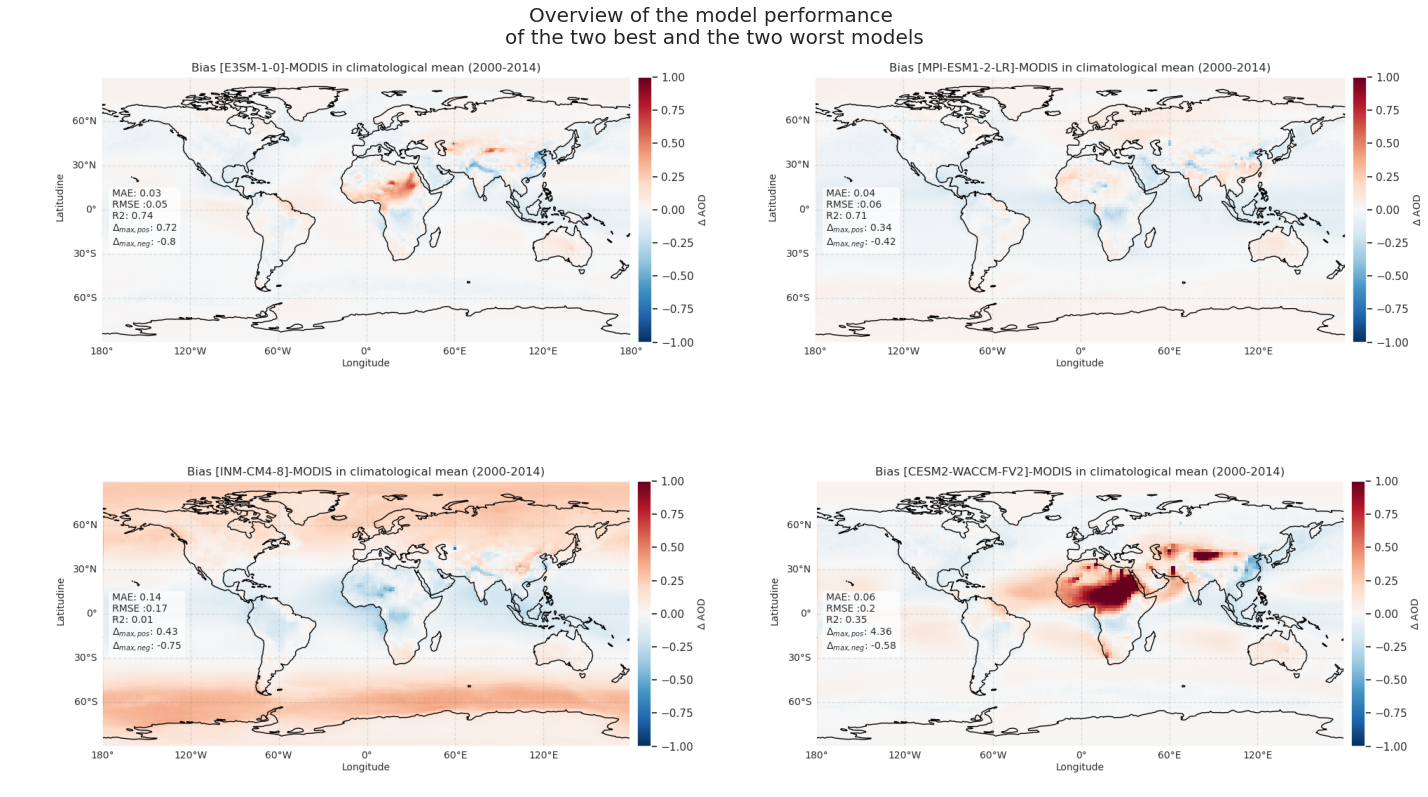

In [16]:
bests = [ranking_tot['Total'][0], ranking_tot['Total'][1]]
worsts = [ranking_tot['Total'][-1], ranking_tot['Total'][-2]]
plot_best_worst_maps(bests, worsts, title = "Overview of the model performance \nof the two best and the two worst models")